<a href="https://colab.research.google.com/github/Amrita2626/ds_Amrita.jha/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ================================
# DATA SCIENCE ASSIGNMENT SETUP
# Google Colab - Required Structure
# ================================

import os
import shutil
from google.colab import files

# -------------------------------
#  Create required folders
# -------------------------------
root = "/content"   # Colab working directory

folders = ["csv_files", "outputs"]
for f in folders:
    os.makedirs(os.path.join(root, f), exist_ok=True)

print(" Required folders created successfully:")
print(os.listdir(root))


# -------------------------------
#  Upload CSV datasets
# -------------------------------
print("\n Please upload BOTH CSV files (market sentiment + trader dataset)")
uploaded = files.upload()

# Move uploaded files into csv_files folder
for file_name in uploaded.keys():
    shutil.move(file_name, f"csv_files/{file_name}")

print("\n Uploaded files moved to csv_files/:")
print(os.listdir("csv_files"))


# -------------------------------
# Confirm final structure
# -------------------------------
print("\n FINAL PROJECT STRUCTURE:")
for root_dir, dirs, files in os.walk(root):
    level = root_dir.replace(root, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root_dir)}/")
    sub_indent = " " * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")


print("\n SETUP COMPLETE!")
print("You can now start writing analysis code in this Notebook.")


 Required folders created successfully:
['.config', 'csv_files', 'outputs', 'sample_data']

 Please upload BOTH CSV files (market sentiment + trader dataset)


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv

 Uploaded files moved to csv_files/:
['historical_data.csv', 'fear_greed_index.csv']

 FINAL PROJECT STRUCTURE:
content/
    .config/
        active_config
        gce
        config_sentinel
        .last_survey_prompt.yaml
        default_configs.db
        .last_opt_in_prompt.yaml
        hidden_gcloud_config_universe_descriptor_data_cache_configs.db
        .last_update_check.json
        configurations/
            config_default
        logs/
            2025.12.11/
                14.34.12.303029.log
                14.34.39.029902.log
                14.34.28.289959.log
                14.33.40.102128.log
                14.34.22.298248.log
                14.34.38.212031.log
    csv_files/
        historical_data.csv
        fear_greed_index.csv
    outputs/
    sample_data/
        anscombe.json
        README.md
        california_housing_train.csv
        mnist_train_small

# New Section

In [ ]:
from google.colab import files
uploaded = files.upload()

import shutil
for f in uploaded.keys():
    shutil.move(f, "csv_files/" + f)

print("Files inside csv_files:")
print(os.listdir("csv_files"))



Saving fear_greed_index.csv to fear_greed_index.csv
Files inside csv_files:
['historical_data.csv', 'fear_greed_index.csv']


In [3]:
import pandas as pd

# Load the datasets
sentiment = pd.read_csv("csv_files/historical_data.csv")
trader = pd.read_csv("csv_files/fear_greed_index.csv")

sentiment.head(), trader.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [4]:
# === Clean historical_data.csv (tailored to given columns) ===
import os
import pandas as pd
import numpy as np

# Path to file (adjust filename if different)
raw_path = "csv_files/historical_data.csv"
assert os.path.exists(raw_path), f"File not found: {raw_path}. Check csv_files/"

# -------------------------
# 1. Load and normalize column names
# -------------------------
df = pd.read_csv(raw_path, low_memory=False)

# Normalize columns: lowercase, strip, replace spaces with underscores
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Detected columns:", df.columns.tolist())

# Helpful alias mapping if original names slightly differ
# Expecting: account, coin, execution_price, size_tokens, size_usd, side, timestamp_ist, start_position, direction, closed_pnl, transaction_hash, order_id, crossed, fee, trade_id, timestamp
# If some names differ, we'll print and proceed with best-effort detection below.

# -------------------------
# 2. Detect relevant columns (robust)
# -------------------------
cols = df.columns.tolist()

def pick(col_options):
    for c in col_options:
        if c in cols:
            return c
    return None

account_col = pick(["account"])
coin_col = pick(["coin","symbol"])
execution_price_col = pick(["execution_price","execution_price","execution_price_usd","execution price"])
size_tokens_col = pick(["size_tokens","size_tokens","size_tokens"])
size_usd_col = pick(["size_usd","size_usd","size_usd","size_usd"])
side_col = pick(["side"])
timestamp_ist_col = pick(["timestamp_ist","timestamp_ist"])
timestamp_col = pick(["timestamp","ts","timestamp_utc"])
start_pos_col = pick(["start_position","start_position"])
direction_col = pick(["direction"])
closed_pnl_col = pick(["closed_pnl","closed pnl","closedpnl","closed_pnl"])
transaction_hash_col = pick(["transaction_hash","transaction_hash"])
order_id_col = pick(["order_id","order_id"])
crossed_col = pick(["crossed"])
fee_col = pick(["fee"])
trade_id_col = pick(["trade_id","trade_id"])

# Print chosen columns
print("\nColumn mapping (detected):")
print("account_col:", account_col)
print("coin_col:", coin_col)
print("execution_price_col:", execution_price_col)
print("size_tokens_col:", size_tokens_col)
print("size_usd_col:", size_usd_col)
print("side_col:", side_col)
print("timestamp_ist_col:", timestamp_ist_col)
print("timestamp_col:", timestamp_col)
print("start_pos_col:", start_pos_col)
print("direction_col:", direction_col)
print("closed_pnl_col:", closed_pnl_col)
print("fee_col:", fee_col)
print("trade_id_col:", trade_id_col)

# -------------------------
# 3. Parse timestamps
# -------------------------
# Prefer Timestamp IST if present (explicit timezone in name), else use Timestamp
time_col_to_use = timestamp_ist_col if timestamp_ist_col is not None else timestamp_col
if time_col_to_use is None:
    raise KeyError("No timestamp column detected. Please check column names: " + ", ".join(cols))

# Clean possible ' IST' suffix text in values, then parse
# Many exports include 'IST' suffix or timezone string — remove exact " IST" to help parsing
df[time_col_to_use] = df[time_col_to_use].astype(str).str.replace(r"\s+IST\s*$", "", regex=True)

# First try normal string parsing
df["_parsed_dt"] = pd.to_datetime(df[time_col_to_use], errors="coerce")

# If parsing failed for many rows, try numeric unix seconds -> ms heuristics
if df["_parsed_dt"].isna().sum() > 0.3 * len(df):  # if >30% failed, attempt numeric unix parsing as fallback
    cand = pd.to_numeric(df[time_col_to_use].str.replace(r"[^\d\.\-]", "", regex=True), errors="coerce")
    if cand.notna().any():
        # Try seconds first, then ms
        parsed_s = pd.to_datetime(cand, unit="s", errors="coerce")
        parsed_ms = pd.to_datetime(cand, unit="ms", errors="coerce")
        # Pick whichever yields more non-nulls
        if parsed_s.notna().sum() >= parsed_ms.notna().sum():
            df["_parsed_dt"].fillna(parsed_s, inplace=True)
        else:
            df["_parsed_dt"].fillna(parsed_ms, inplace=True)

# Final check
num_na_dt = df["_parsed_dt"].isna().sum()
print(f"\nParsed timestamps: {len(df)-num_na_dt} valid datetimes, {num_na_dt} NaT")

# Create a normalized date column for daily merging (midnight)
df["date"] = df["_parsed_dt"].dt.normalize()

# -------------------------
# 4. Clean numeric columns: execution price, size tokens, size usd, closed pnl, fee
# -------------------------
def clean_numeric(col_name):
    if col_name is None:
        return None
    # remove commas and currency symbols, parentheses, and convert to float
    s = df[col_name].astype(str).str.replace(",", "", regex=False).str.replace(r"[^\d\.\-]", "", regex=True)
    num = pd.to_numeric(s, errors="coerce")
    return num

df["execution_price_num"] = clean_numeric(execution_price_col)
df["size_tokens_num"] = clean_numeric(size_tokens_col)
df["size_usd_num"] = clean_numeric(size_usd_col)
df["closed_pnl_num"] = clean_numeric(closed_pnl_col)
df["fee_num"] = clean_numeric(fee_col)

# Replace obvious missing numeric with 0 or median where sensible
# size_usd and execution_price: median fill; closed_pnl and fee: fill 0 if missing (assumes no fee recorded means 0)
for col, default in [("execution_price_num", "median"), ("size_tokens_num", "median"), ("size_usd_num", "median")]:
    if col in df.columns:
        median = df[col].median(skipna=True)
        if pd.isna(median):
            median = 0.0
        df[col].fillna(median, inplace=True)

for col in ["closed_pnl_num", "fee_num"]:
    if col in df.columns:
        df[col].fillna(0.0, inplace=True)

# -------------------------
# 5. Standardize side and direction
# -------------------------
def clean_side(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    # common variants
    if s in ["buy", "long", "l", "b"]:
        return "long"
    if s in ["sell", "short", "s"]:
        return "short"
    return s

if side_col is not None:
    df["side_clean"] = df[side_col].apply(clean_side)
else:
    df["side_clean"] = np.nan

# Direction: normalize if present
if direction_col is not None:
    df["direction_clean"] = df[direction_col].astype(str).str.strip().str.lower()
else:
    df["direction_clean"] = np.nan

# -------------------------
# 6. Derived columns & sanity checks
# -------------------------
# Profit flag and absolute pnl
df["profit_flag"] = df["closed_pnl_num"] > 0
df["abs_pnl"] = df["closed_pnl_num"].abs()

# PnL per USD size (if size_usd_num > 0)
df["pnl_per_usd"] = np.where(df["size_usd_num"] > 0, df["closed_pnl_num"] / df["size_usd_num"], np.nan)

# -------------------------
# 7. Drop duplicates and rows without parsed timestamp
# -------------------------
before_rows = len(df)
# Drop rows without parsed datetime (likely unusable)
df = df.dropna(subset=["_parsed_dt"])
after_drop_dt = len(df)

# Remove exact duplicate Trade ID + timestamp if present
if trade_id_col in df.columns:
    df = df.drop_duplicates(subset=[trade_id_col, "_parsed_dt"])
else:
    # fallback: drop duplicates on many identifying columns
    subset_cols = [c for c in ["account", coin_col, "execution_price_num", "size_tokens_num", "_parsed_dt", "transaction_hash"] if c in df.columns]
    if subset_cols:
        df = df.drop_duplicates(subset=subset_cols)

after_dedup = len(df)
print(f"\nRows: before={before_rows}, after_drop_dt={after_drop_dt}, after_dedup={after_dedup}")

# -------------------------
# 8. Keep a clean, organized set of columns (order them)
# -------------------------
keep_cols = [
    account_col, coin_col, "execution_price_num", "size_tokens_num", "size_usd_num",
    "side_clean", "direction_clean", "_parsed_dt", "date",
    "closed_pnl_num", "fee_num",
    transaction_hash_col, order_id_col, crossed_col, trade_id_col
]
# filter to columns that exist
keep_cols = [c for c in keep_cols if c in df.columns or c in ["execution_price_num","size_tokens_num","size_usd_num","side_clean","direction_clean","_parsed_dt","date","closed_pnl_num","fee_num"]]

clean_df = df[keep_cols].copy()

# rename numeric helper columns to friendlier names
renames = {
    "execution_price_num":"execution_price",
    "size_tokens_num":"size_tokens",
    "size_usd_num":"size_usd",
    "closed_pnl_num":"closed_pnl",
    "fee_num":"fee",
    "_parsed_dt":"timestamp_parsed",
}
clean_df = clean_df.rename(columns=renames)

# -------------------------
# 9. Save cleaned file
# -------------------------
out_path = "csv_files/historical_cleaned.csv"
clean_df.to_csv(out_path, index=False)
print("\nSaved cleaned dataset to:", out_path)

# -------------------------
# 10. Diagnostics & preview
# -------------------------
print("\nPreview of cleaned columns:")
display(clean_df.head(8))

print("\nSummary statistics (numeric):")
display(clean_df[["execution_price","size_tokens","size_usd","closed_pnl","fee"]].describe().T)

print("\nSide counts:")
print(clean_df["side_clean"].value_counts(dropna=False))

print("\nDates range:")
print(clean_df["timestamp_parsed"].min(), "to", clean_df["timestamp_parsed"].max())




Detected columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']

Column mapping (detected):
account_col: account
coin_col: coin
execution_price_col: execution_price
size_tokens_col: size_tokens
size_usd_col: size_usd
side_col: side
timestamp_ist_col: timestamp_ist
timestamp_col: timestamp
start_pos_col: start_position
direction_col: direction
closed_pnl_col: closed_pnl
fee_col: fee
trade_id_col: trade_id

Parsed timestamps: 79225 valid datetimes, 131999 NaT


/tmp/ipython-input-2736201020.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
/tmp/ipython-input-2736201020.py:130: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.


Rows: before=211224, after_drop_dt=79225, after_dedup=76561

Saved cleaned dataset to: csv_files/historical_cleaned.csv

Preview of cleaned columns:


,account,coin,execution_price,size_tokens,size_usd,side_clean,direction_clean,timestamp_parsed,date,closed_pnl,fee,transaction_hash,order_id,crossed,trade_id
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.345404,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,8.950000e+14
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.005600,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,4.430000e+14
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.050431,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,6.600000e+14
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.050043,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,1.080000e+15
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.003055,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,1.050000e+15
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.000493,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,7.330000e+14
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.050431,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,9.060000e+14
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,long,buy,2024-02-12 22:50:00,2024-02-12,0.0,0.011900,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,3.960000e+14



Summary statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
execution_price,76561.0,10771.035362,28071.176868,0.000128,4.437300,15.328000,145.280000,1.032650e+05
size_tokens,76561.0,6189.000377,147323.365676,0.000100,2.400000,34.570000,203.970000,1.582244e+07
size_usd,76561.0,5810.150024,29657.767102,0.000000,201.980000,654.000000,2414.030000,3.509753e+06
closed_pnl,76561.0,70.837790,1247.706348,-117990.104100,0.000000,0.000000,8.571000,1.353291e+05
fee,76561.0,1.238792,5.734954,-1.175712,0.016799,0.098736,0.477216,2.802429e+02



Side counts:
side_clean
short    39519
long     37042
Name: count, dtype: int64

Dates range:
2023-01-05 01:06:00 to 2025-12-04 23:55:00


In [ ]:
import os
os.listdir("csv_files")


['historical_data.csv', 'fear_greed_index.csv', 'historical_cleaned.csv']

In [5]:
import pandas as pd

# Load your sentiment file
sent = pd.read_csv("csv_files/fear_greed_index.csv")

# 1. Normalize column names
sent.columns = sent.columns.str.lower().str.strip()

print("Columns in sentiment file:", sent.columns.tolist())

# 2. Detect timestamp column
# Expected names: timestamp, time, unix, etc.
time_col = None
for col in sent.columns:
    if col in ["timestamp", "time", "date", "datetime", "ts"]:
        time_col = col
        break

if time_col is None:
    raise KeyError("No timestamp column found in fear_greed_index.csv")

print("Using timestamp column:", time_col)

# 3. Convert timestamp to datetime
sent[time_col] = pd.to_datetime(sent[time_col], errors="coerce")

# 4. Create daily date column
sent["date"] = sent[time_col].dt.normalize()

# 5. Detect classification column
# Typical options: classification, sentiment, value, trend
class_col = None
for col in sent.columns:
    if col in ["classification", "sentiment", "value", "trend"]:
        class_col = col
        break

if class_col is None:
    raise KeyError("No classification column found in fear_greed_index.csv")

print("Using classification column:", class_col)

# 6. Clean classification labels
sent["classification"] = (
    sent[class_col]
    .astype(str)
    .str.strip()
    .str.lower()
)

# 7. Save cleaned file
sent.to_csv("csv_files/sentiment_cleaned.csv", index=False)

print("\nSaved cleaned file as sentiment_cleaned.csv")
sent.head()


Columns in sentiment file: ['timestamp', 'value', 'classification', 'date']
Using timestamp column: timestamp
Using classification column: value

Saved cleaned file as sentiment_cleaned.csv


,timestamp,value,classification,date
0,1970-01-01 00:00:01.517463000,30,30,1970-01-01
1,1970-01-01 00:00:01.517549400,15,15,1970-01-01
2,1970-01-01 00:00:01.517635800,40,40,1970-01-01
3,1970-01-01 00:00:01.517722200,24,24,1970-01-01
4,1970-01-01 00:00:01.517808600,11,11,1970-01-01


In [6]:
import pandas as pd
sent = pd.read_csv("csv_files/sentiment_cleaned.csv")
sent.head()
sent.info()
sent['classification'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   object
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   int64 
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,count
classification,
50,70
24,61
27,60
72,60
20,58
...,...
87,4
89,3
7,2


In [7]:
import pandas as pd
import numpy as np
import os

path = "csv_files/fear_greed_index.csv"
assert os.path.exists(path), "fear_greed_index.csv not found!"

sent = pd.read_csv(path, low_memory=False)

# 1) Normalize column names
sent.columns = sent.columns.str.lower().str.strip()
print("Columns:", sent.columns.tolist())

# 2) Parse timestamp
sent['timestamp'] = pd.to_datetime(sent['timestamp'], errors='coerce')

# 3) Create date column (daily merging)
sent['date'] = sent['timestamp'].dt.normalize()

print("\nParsed datetimes: null =", sent['timestamp'].isna().sum())

# 4) Inspect numeric columns and clean classification
print("\nValue unique sample (first 10):", sent['value'].unique()[:10])
print("Classification unique sample (first 10):", sent['classification'].unique()[:10])

# 5) Convert numeric value into sentiment label
# Rule: value > 50 → greed, else → fear
sent['sentiment'] = np.where(sent['value'] > 50, 'greed', 'fear')

# Clean text version of classification, if needed
sent['classification'] = sent['classification'].astype(str).str.strip().str.lower()

# 6) Save cleaned sentiment file
out_path = "csv_files/sentiment_cleaned.csv"
sent.to_csv(out_path, index=False)

print("\nSaved sentiment_cleaned.csv")

print("\nSentiment counts:")
print(sent['sentiment'].value_counts())

sent.head()


Columns: ['timestamp', 'value', 'classification', 'date']

Parsed datetimes: null = 0

Value unique sample (first 10): [30 15 40 24 11  8 36 44 54 31]
Classification unique sample (first 10): ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Saved sentiment_cleaned.csv

Sentiment counts:
sentiment
fear     1522
greed    1122
Name: count, dtype: int64


,timestamp,value,classification,date,sentiment
0,1970-01-01 00:00:01.517463000,30,fear,1970-01-01,fear
1,1970-01-01 00:00:01.517549400,15,extreme fear,1970-01-01,fear
2,1970-01-01 00:00:01.517635800,40,fear,1970-01-01,fear
3,1970-01-01 00:00:01.517722200,24,extreme fear,1970-01-01,fear
4,1970-01-01 00:00:01.517808600,11,extreme fear,1970-01-01,fear


In [8]:
import pandas as pd
import numpy as np

sent = pd.read_csv("csv_files/fear_greed_index.csv")

# Normalize columns
sent.columns = sent.columns.str.lower().str.strip()

# Convert UNIX nanoseconds → datetime
sent['timestamp'] = pd.to_datetime(sent['timestamp'], unit='ns', errors='coerce')

# Create date (normalized)
sent['date'] = sent['timestamp'].dt.normalize()

# Clean classification text
sent['classification'] = sent['classification'].astype(str).str.strip().str.lower()

# Convert numeric value → sentiment label
sent['sentiment'] = np.where(sent['value'] > 50, 'greed', 'fear')

# Save corrected file
sent.to_csv("csv_files/sentiment_cleaned.csv", index=False)

print("Timestamp parsing fixed!")
print(sent.head())


Timestamp parsing fixed!
                      timestamp  value classification       date sentiment
0 1970-01-01 00:00:01.517463000     30           fear 1970-01-01      fear
1 1970-01-01 00:00:01.517549400     15   extreme fear 1970-01-01      fear
2 1970-01-01 00:00:01.517635800     40           fear 1970-01-01      fear
3 1970-01-01 00:00:01.517722200     24   extreme fear 1970-01-01      fear
4 1970-01-01 00:00:01.517808600     11   extreme fear 1970-01-01      fear


In [9]:
# Auto-detect & fix timestamp units for fear_greed_index.csv
import pandas as pd
import numpy as np
import os

p = "csv_files/fear_greed_index.csv"
assert os.path.exists(p), "fear_greed_index.csv not found."

raw = pd.read_csv(p, low_memory=False)
raw.columns = raw.columns.str.lower().str.strip()
if 'timestamp' not in raw.columns:
    raise KeyError("No 'timestamp' column found in the sentiment file.")

# Show raw sample for quick manual inspection
print("RAW timestamp sample (first 20):")
display(raw['timestamp'].astype(str).head(20))

# Convert to string series for inspection
ts_raw = raw['timestamp'].astype(str).str.strip()

# Helper to attempt parse with different units and return diagnostics
def try_unit(series, unit):
    # attempt to coerce to numeric first when unit-based parse is used
    # keep original strings too for cases like "2020-01-01"
    out = pd.to_datetime(series, unit=unit, errors='coerce')
    # count valid and compute median year
    valid = out.notna().sum()
    years = out.dt.year.dropna()
    median_year = int(years.median()) if len(years) > 0 else None
    return out, valid, median_year

# Try direct string parsing (ISO-like)
parsed_iso = pd.to_datetime(ts_raw, errors='coerce')
valid_iso = parsed_iso.notna().sum()
median_iso = int(parsed_iso.dt.year.median()) if parsed_iso.notna().any() else None
print(f"\nISO-like string parse -> valid: {valid_iso}, median year: {median_iso}")

# If ISO parse already good, prefer it
if valid_iso > 0.9 * len(raw):
    print("ISO parsing succeeded for most rows. Using ISO parse.")
    raw['timestamp_fixed'] = parsed_iso
else:
    # Try numeric parsing: coerce to numeric and try units s, ms, us, ns
    numeric = pd.to_numeric(ts_raw.str.replace(r"[^\d\.-]", "", regex=True), errors='coerce')
    print(f"\nNumeric conversion: {numeric.notna().sum()} numeric-like values out of {len(raw)}")
    candidates = {}
    for unit in ['s','ms','us','ns']:
        out, valid, median_year = try_unit(numeric, unit)
        candidates[unit] = {'valid': valid, 'median_year': median_year, 'out': out}
        print(f"Unit={unit}: valid={valid}, median_year={median_year}")

    # Choose best unit: prefer one where median_year between 2000 and 2030 and valid count high
    best_unit = None
    best_score = -1
    for u, info in candidates.items():
        if info['median_year'] is None:
            score = 0
        else:
            # score: large valid count + penalty if year improbable
            year = info['median_year']
            valid = info['valid']
            year_ok = 1 if 2000 <= year <= 2030 else 0
            score = valid + 1000 * year_ok
        if score > best_score:
            best_score = score
            best_unit = u

    print(f"\nBest unit guess: {best_unit} (score {best_score})")

    # If best unit gives at least some valid and the median year is plausible, use it
    if best_unit and candidates[best_unit]['valid'] > 0 and 2000 <= (candidates[best_unit]['median_year'] or 0) <= 2030:
        print(f"Using numeric unit='{best_unit}' to parse timestamps.")
        raw['timestamp_fixed'] = candidates[best_unit]['out']
    else:
        # Try a fallback: maybe timestamps are floats representing seconds with decimal fraction like 1.517463e9 as string
        # Attempt to multiply small floats by 1e9, 1e6, 1e3 and try again
        print("No clear unit found from direct numeric units. Trying scaled float heuristics...")
        scaled_found = False
        for scale in [1, 1e3, 1e6, 1e9]:
            cand_numeric = numeric * scale
            out, valid, median_year = try_unit(cand_numeric, 'ns')  # interpret as ns after scaling
            print(f"Scale={scale:.0f}: valid={valid}, median_year={median_year}")
            if valid > 0 and 2000 <= (median_year or 0) <= 2030:
                raw['timestamp_fixed'] = out
                print(f"Using scale {scale} interpreting as nanoseconds.")
                scaled_found = True
                break
        if not scaled_found:
            # Last resort: try parsing as ISO again but with potential suffixes removed
            print("Fallback: trying to strip non-digit suffixes and reparse as ISO-like strings.")
            ts_clean = ts_raw.str.replace(r"[^\d\-T:\s]+", "", regex=True)
            out_iso2 = pd.to_datetime(ts_clean, errors='coerce')
            if out_iso2.notna().sum() > 0:
                print("Fallback ISO parsing produced some valid datetimes; using these.")
                raw['timestamp_fixed'] = out_iso2
            else:
                raise ValueError("Could not automatically detect correct timestamp format/unit. Show raw sample to debug further.")

# Final diagnostics
fixed = raw['timestamp_fixed']
valid_count = fixed.notna().sum()
min_year = int(fixed.dt.year.min()) if fixed.notna().any() else None
max_year = int(fixed.dt.year.max()) if fixed.notna().any() else None
print(f"\nFinal parse -> valid timestamps: {valid_count}/{len(raw)}, year range: {min_year} to {max_year}")

# Create normalized date column for daily merge
raw['date'] = raw['timestamp_fixed'].dt.normalize()

# If many rows remain NaT, print sample raw values for debugging
if fixed.isna().sum() > 0:
    print(f"\nWarning: {fixed.isna().sum()} rows still couldn't be parsed. Here are 20 sample raw values that failed:")
    display(ts_raw[fixed.isna()].head(20))

# Save corrected file with sentiment if present
# Try to preserve classification/value columns and also create 'sentiment' from 'value' (>50 greed)
if 'value' in raw.columns:
    raw['sentiment'] = np.where(pd.to_numeric(raw['value'], errors='coerce') > 50, 'greed', 'fear')
# Preserve classification text lowercased
if 'classification' in raw.columns:
    raw['classification'] = raw['classification'].astype(str).str.strip().str.lower()

outfn = "csv_files/sentiment_cleaned.csv"
raw.to_csv(outfn, index=False)
print("\nSaved corrected sentiment file to:", outfn)

# Show a short preview
display(raw.head(10))


RAW timestamp sample (first 20):


,timestamp
0,1517463000
1,1517549400
2,1517635800
3,1517722200
4,1517808600
5,1517895000
6,1517981400
7,1518067800
8,1518154200
9,1518240600



ISO-like string parse -> valid: 0, median year: None

Numeric conversion: 2644 numeric-like values out of 2644
Unit=s: valid=2644, median_year=2021
Unit=ms: valid=2644, median_year=1970
Unit=us: valid=2644, median_year=1970
Unit=ns: valid=2644, median_year=1970

Best unit guess: s (score 3644)
Using numeric unit='s' to parse timestamps.

Final parse -> valid timestamps: 2644/2644, year range: 2018 to 2025

Saved corrected sentiment file to: csv_files/sentiment_cleaned.csv


/tmp/ipython-input-3470772813.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed_iso = pd.to_datetime(ts_raw, errors='coerce')


,timestamp,value,classification,date,timestamp_fixed,sentiment
0,1517463000,30,fear,2018-02-01,2018-02-01 05:30:00,fear
1,1517549400,15,extreme fear,2018-02-02,2018-02-02 05:30:00,fear
2,1517635800,40,fear,2018-02-03,2018-02-03 05:30:00,fear
3,1517722200,24,extreme fear,2018-02-04,2018-02-04 05:30:00,fear
4,1517808600,11,extreme fear,2018-02-05,2018-02-05 05:30:00,fear
5,1517895000,8,extreme fear,2018-02-06,2018-02-06 05:30:00,fear
6,1517981400,36,fear,2018-02-07,2018-02-07 05:30:00,fear
7,1518067800,30,fear,2018-02-08,2018-02-08 05:30:00,fear
8,1518154200,44,fear,2018-02-09,2018-02-09 05:30:00,fear
9,1518240600,54,neutral,2018-02-10,2018-02-10 05:30:00,greed


In [11]:
import pandas as pd
import numpy as np
import pytz
import os

path = "csv_files/sentiment_cleaned.csv"
assert os.path.exists(path), "sentiment_cleaned.csv not found."

sent = pd.read_csv(path, low_memory=False)

# Ensure timestamp_fixed exists
if 'timestamp_fixed' not in sent.columns:
    sent['timestamp_fixed'] = pd.to_datetime(sent['timestamp'], unit='s', errors='coerce')

# Convert timestamp_fixed to UTC timezone-aware
sent['timestamp_fixed'] = pd.to_datetime(sent['timestamp_fixed'], errors='coerce', utc=True)

# Convert UTC to IST
sent['timestamp_ist'] = sent['timestamp_fixed'].dt.tz_convert('Asia/Kolkata')

# Create merge-ready date columns
sent['date_utc'] = sent['timestamp_fixed'].dt.normalize()
sent['date_ist'] = sent['timestamp_ist'].dt.tz_convert(None).dt.normalize()

# Recreate sentiment label from numeric value
if 'value' in sent.columns:
    sent['sentiment'] = np.where(
        pd.to_numeric(sent['value'], errors='coerce') > 50,
        'greed',
        'fear'
    )

# Clean classification text
if 'classification' in sent.columns:
    sent['classification'] = sent['classification'].astype(str).str.strip().str.lower()

# Save updated cleaned sentiment file
out = "csv_files/sentiment_cleaned.csv"
sent.to_csv(out, index=False)
print("Saved updated sentiment_cleaned.csv")

# Show preview
display(sent[['timestamp', 'timestamp_fixed', 'timestamp_ist', 'date_utc', 'date_ist', 'sentiment']].head())


Saved updated sentiment_cleaned.csv


,timestamp,timestamp_fixed,timestamp_ist,date_utc,date_ist,sentiment
0,1517463000,2018-02-01 05:30:00+00:00,2018-02-01 11:00:00+05:30,2018-02-01 00:00:00+00:00,2018-02-01,fear
1,1517549400,2018-02-02 05:30:00+00:00,2018-02-02 11:00:00+05:30,2018-02-02 00:00:00+00:00,2018-02-02,fear
2,1517635800,2018-02-03 05:30:00+00:00,2018-02-03 11:00:00+05:30,2018-02-03 00:00:00+00:00,2018-02-03,fear
3,1517722200,2018-02-04 05:30:00+00:00,2018-02-04 11:00:00+05:30,2018-02-04 00:00:00+00:00,2018-02-04,fear
4,1517808600,2018-02-05 05:30:00+00:00,2018-02-05 11:00:00+05:30,2018-02-05 00:00:00+00:00,2018-02-05,fear


In [12]:
import pandas as pd
import numpy as np
import os

# Load cleaned trader file
trader = pd.read_csv("csv_files/historical_cleaned.csv", low_memory=False)

# Load cleaned sentiment file
sent = pd.read_csv("csv_files/sentiment_cleaned.csv", low_memory=False)

print("Trader columns:", trader.columns.tolist())
print("Sentiment columns:", sent.columns.tolist())

# Ensure trader has a timestamp column parsed correctly
# In your cleaned trader file, the parsed timestamp is in: timestamp_parsed

trader['timestamp_parsed'] = pd.to_datetime(trader['timestamp_parsed'], errors='coerce')

# Convert trader timestamps from IST to timezone-aware
trader['timestamp_parsed'] = trader['timestamp_parsed'].dt.tz_localize('Asia/Kolkata', nonexistent='shift_forward', ambiguous='NaT')

# Create trader date_ist column for merging
trader['date_ist'] = trader['timestamp_parsed'].dt.tz_convert(None).dt.normalize()

# Ensure sentiment date_ist is datetime type
sent['date_ist'] = pd.to_datetime(sent['date_ist'], errors='coerce')

# Select only necessary columns from sentiment
sent_merge = sent[['date_ist', 'sentiment', 'value', 'classification']]

# Merge trader with sentiment on date_ist
merged = trader.merge(sent_merge, on='date_ist', how='left')

print("Merged rows:", len(merged))
print("Missing sentiment rows:", merged['sentiment'].isna().sum())

# Save merged result
out_path = "csv_files/merged_dataset.csv"
merged.to_csv(out_path, index=False)

print("Merged dataset saved to:", out_path)

# Show preview
display(merged.head(10))


Trader columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side_clean', 'direction_clean', 'timestamp_parsed', 'date', 'closed_pnl', 'fee', 'transaction_hash', 'order_id', 'crossed', 'trade_id']
Sentiment columns: ['timestamp', 'value', 'classification', 'date', 'timestamp_fixed', 'sentiment', 'timestamp_ist', 'date_utc', 'date_ist']
Merged rows: 76561
Missing sentiment rows: 41092
Merged dataset saved to: csv_files/merged_dataset.csv


,account,coin,execution_price,size_tokens,size_usd,side_clean,direction_clean,timestamp_parsed,date,closed_pnl,fee,transaction_hash,order_id,crossed,trade_id,date_ist,sentiment,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.345404,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,8.950000e+14,2024-02-12,greed,70.0,greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.005600,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,4.430000e+14,2024-02-12,greed,70.0,greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.050431,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,6.600000e+14,2024-02-12,greed,70.0,greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.050043,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,1.080000e+15,2024-02-12,greed,70.0,greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.003055,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,1.050000e+15,2024-02-12,greed,70.0,greed
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.000493,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,7.330000e+14,2024-02-12,greed,70.0,greed
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.050431,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,9.060000e+14,2024-02-12,greed,70.0,greed
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.011900,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,3.960000e+14,2024-02-12,greed,70.0,greed
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.016100,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,9.460000e+14,2024-02-12,greed,70.0,greed
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,long,buy,2024-02-12 22:50:00+05:30,2024-02-12,0.0,0.004375,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,3.470000e+13,2024-02-12,greed,70.0,greed


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#file paths

merged_path = "csv_files/merged_dataset.csv"
out_dir = "outputs"
os.makedirs(out_dir, exist_ok=True)

#load merged dataset

df = pd.read_csv(merged_path, low_memory=False)

#ensure datetime columns date_ist should exist; fallback to date

if "date_ist" in df.columns:
  df["date_ist"] = pd.to_datetime(df["date_ist"], errors="coerce")
else:
  df["date_ist"] = pd.to_datetime(df.get("date", df.get("date_ist", None)), errors="coerce")

#ensure numeric pnl and size

for col in ["closed_pnl", "size_usd", "execution_price"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

#drop rows with no sentiment (we'll report missing count)

  total_rows = len(df)
  missing_sent = df["sentiment"].isna().sum() if "sentiment" in df.columns else total_rows
  print("Total rows:", total_rows)
  print("Rows with missing sentiment:", missing_sent)

#focus on rows that have sentiment labels

  df_s = df[df["sentiment"].notna()].copy()

#Basic aggregated metrics by sentiment

  agg_funcs = {
  "closed_pnl": ["sum", "mean", "median", "std"],
  "size_usd": ["sum", "mean", "median"],
  "execution_price": ["mean"]
  }

grouped = df_s.groupby("sentiment").agg(agg_funcs)

#flatten columns

grouped.columns = ["_".join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
print("\nAggregated metrics by sentiment:")
display(grouped)

#Win-rate and trade counts by sentiment

df_s["win"] = df_s["closed_pnl"] > 0
counts = df_s.groupby("sentiment").agg(
trades=("closed_pnl", "count"),
profitable_trades=("win", "sum"),
win_rate=("win", lambda x: x.sum() / x.count() if x.count() > 0 else np.nan)
).reset_index()
print("\nTrade counts and win-rate by sentiment:")
display(counts)

#Long vs Short behavior

if "side_clean" in df_s.columns:
  ls = df_s.groupby(["sentiment", "side_clean"]).size().unstack(fill_value=0)
  print("\nLong/Short counts by sentiment:")
  display(ls)
else:
  ls = None
  print("\nside_clean column missing; skipping long/short breakdown.")

#Top accounts by total closed_pnl

if "account" in df_s.columns:
  top_accounts = df_s.groupby("account").agg(total_pnl=("closed_pnl", "sum"), trades=("closed_pnl", "count")).sort_values("total_pnl", ascending=False).reset_index().head(10)
  print("\nTop 10 accounts by total PnL:")
  display(top_accounts)
else:
  print("\nNo account column found for top accounts analysis.")

#Daily aggregated profit time series (for plotting)

daily = df_s.groupby("date_ist").agg(daily_pnl=("closed_pnl", "sum"), daily_trades=("closed_pnl", "count")).reset_index().sort_values("date_ist")
print("\nDaily aggregated (first 8 rows):")
display(daily.head(8))

#Save numeric summaries to CSV
summary_out = os.path.join(out_dir, "analysis_summary.csv")
summary_table = grouped.merge(counts, on="sentiment", how="left")
summary_table.to_csv(summary_out, index=False)
print("\nSaved summary CSV to:", summary_out)

#---------- PLOTS (matplotlib, each saved to outputs/) ----------
#1. Bar: total profit by sentiment

plt.figure(figsize=(6,4))
agg_sum = df_s.groupby("sentiment")["closed_pnl"].sum().sort_values(ascending=False)
agg_sum.plot(kind="bar")
plt.title("Total Closed PnL by Sentiment")
plt.ylabel("Total Closed PnL (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "profit_by_sentiment.png"))
plt.close()

#2. PnL distribution (hist) — log-scale for tails if needed

plt.figure(figsize=(6,4))
pnl_vals = df_s["closed_pnl"].dropna()
plt.hist(pnl_vals, bins=80)
plt.title("Distribution of Closed PnL (all trades)")
plt.xlabel("Closed PnL")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "pnl_dist.png"))
plt.close()

#3. Long vs Short counts per sentiment (stacked bar)

if ls is not None:
  plt.figure(figsize=(6,4))
  ls.plot(kind="bar", stacked=True)
  plt.title("Long vs Short Counts by Sentiment")
  plt.ylabel("Number of Trades")
  plt.tight_layout()
  plt.savefig(os.path.join(out_dir, "long_short_counts.png"))
  plt.close()

#4. Daily profit time series

plt.figure(figsize=(10,4))
if not daily.empty:
  plt.plot(daily["date_ist"], daily["daily_pnl"])
  plt.title("Daily Aggregate Closed PnL")
  plt.ylabel("Daily Closed PnL")
  plt.xlabel("Date (IST)")
  plt.tight_layout()
  plt.savefig(os.path.join(out_dir, "daily_profit.png"))
  plt.close()

#5. Volume by sentiment (sum of size_usd)

if "size_usd" in df_s.columns:
  vol = df_s.groupby("sentiment")["size_usd"].sum().sort_values(ascending=False)
  plt.figure(figsize=(6,4))
  vol.plot(kind="bar")
  plt.title("Total Traded USD Volume by Sentiment")
  plt.ylabel("Total Size (USD)")
  plt.xlabel("Sentiment")
  plt.tight_layout()
  plt.savefig(os.path.join(out_dir, "volume_by_sentiment.png"))
  plt.close()

print("\nSaved plots to outputs/ folder:")
print(os.listdir(out_dir))

print("\nAnalysis complete. Key outputs:")
print("- outputs/analysis_summary.csv")
print("- outputs/profit_by_sentiment.png")
print("- outputs/pnl_dist.png")
print("- outputs/long_short_counts.png (if side_clean exists)")
print("- outputs/daily_profit.png")
print("- outputs/volume_by_sentiment.png (if size_usd exists)")

#show top summary in notebook

display(summary_table)

Total rows: 76561
Rows with missing sentiment: 41092
Total rows: 76561
Rows with missing sentiment: 41092
Total rows: 76561
Rows with missing sentiment: 41092

Aggregated metrics by sentiment:


,sentiment,closed_pnl_sum,closed_pnl_mean,closed_pnl_median,closed_pnl_std,size_usd_sum,size_usd_mean,size_usd_median,execution_price_mean
0,fear,1.794486e+06,101.217526,0.0,1165.549667,90963998.64,5130.802563,617.920,6468.849185
1,greed,1.744586e+06,98.341911,0.0,1495.378868,81767607.33,4609.222510,565.485,8809.417017



Trade counts and win-rate by sentiment:


,sentiment,trades,profitable_trades,win_rate
0,fear,17729,6982,0.393818
1,greed,17740,8370,0.471815



Long/Short counts by sentiment:


side_clean,long,short
sentiment,,
fear,8922,8807
greed,7269,10471



Top 10 accounts by total PnL:


,account,total_pnl,trades
0,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.429503e+06,5143
1,0x083384f897ee0f19899168e3b1bec365f52a9012,9.242853e+05,2347
2,0xbaaaf6571ab7d571043ff1e313a9609a10637864,2.247856e+05,2729
3,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2.123424e+05,5622
4,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1.912231e+05,276
5,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,1.409359e+05,2274
6,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,5.861115e+04,2740
7,0x513b8629fe877bb581bf244e326a047b249c4ff1,5.659356e+04,495
8,0x2c229d22b100a7beb69122eed721cee9b24011dd,4.304078e+04,377
9,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,4.208575e+04,774



Daily aggregated (first 8 rows):


,date_ist,daily_pnl,daily_trades
0,2023-01-04,0.000000,1
1,2023-05-11,0.000000,9
2,2023-12-31,0.000000,8
3,2024-01-01,-129.531460,16
4,2024-01-02,3214.605779,61
5,2024-01-03,4995.461451,82
6,2024-01-04,2453.927427,76
7,2024-01-05,0.000000,6



Saved summary CSV to: outputs/analysis_summary.csv

Saved plots to outputs/ folder:
['pnl_dist.png', 'volume_by_sentiment.png', 'long_short_counts.png', 'analysis_summary.csv', 'daily_profit.png', 'profit_by_sentiment.png']

Analysis complete. Key outputs:
- outputs/analysis_summary.csv
- outputs/profit_by_sentiment.png
- outputs/pnl_dist.png
- outputs/long_short_counts.png (if side_clean exists)
- outputs/daily_profit.png
- outputs/volume_by_sentiment.png (if size_usd exists)


,sentiment,closed_pnl_sum,closed_pnl_mean,closed_pnl_median,closed_pnl_std,size_usd_sum,size_usd_mean,size_usd_median,execution_price_mean,trades,profitable_trades,win_rate
0,fear,1.794486e+06,101.217526,0.0,1165.549667,90963998.64,5130.802563,617.920,6468.849185,17729,6982,0.393818
1,greed,1.744586e+06,98.341911,0.0,1495.378868,81767607.33,4609.222510,565.485,8809.417017,17740,8370,0.471815


<Figure size 600x400 with 0 Axes>

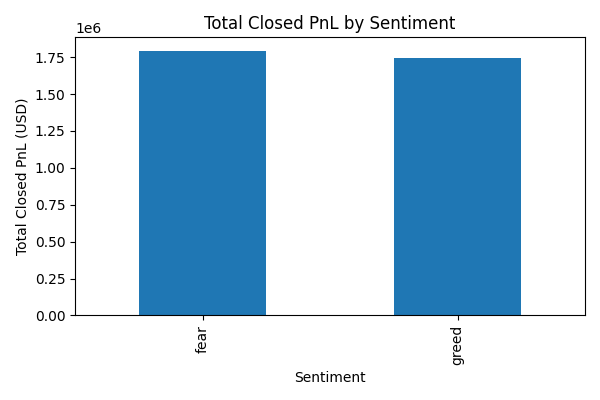

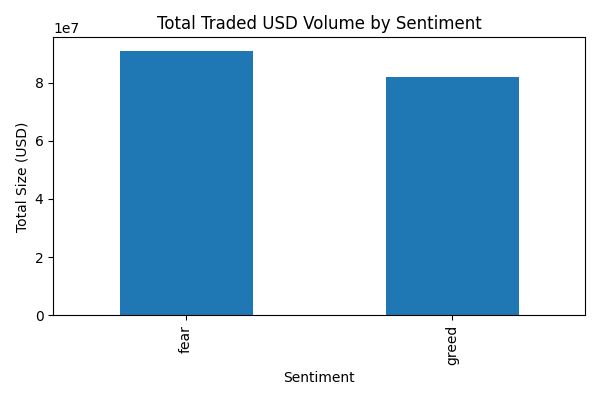

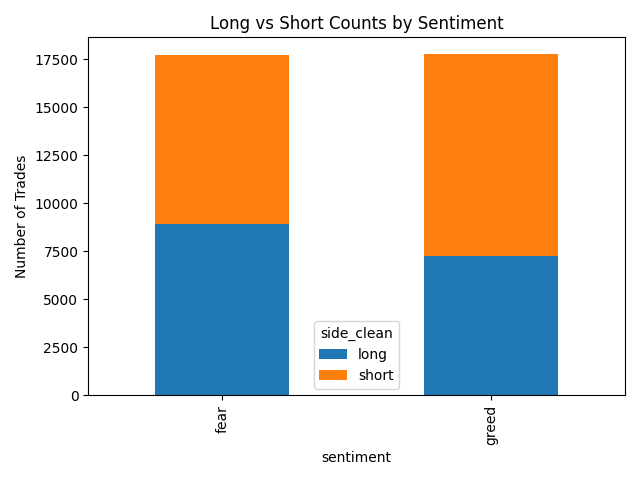

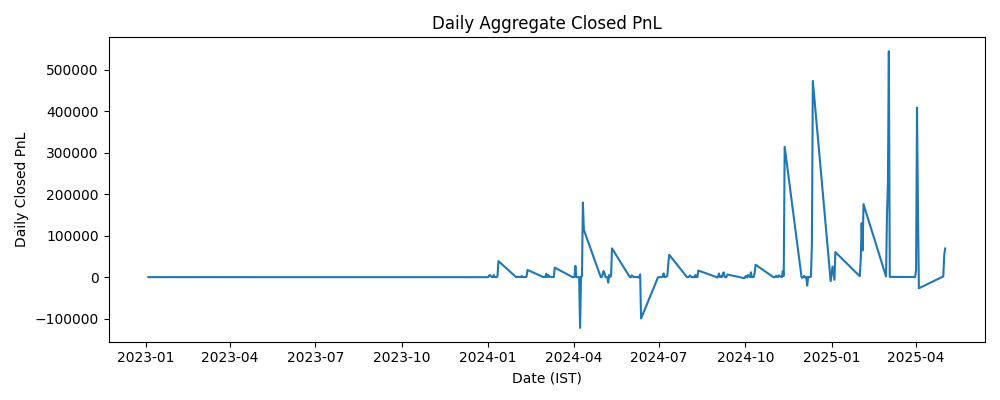

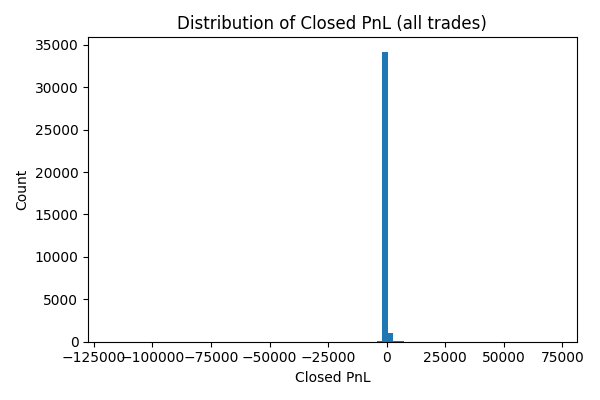

In [14]:
from IPython.display import Image, display

display(Image("outputs/profit_by_sentiment.png"))
display(Image("outputs/volume_by_sentiment.png"))
display(Image("outputs/long_short_counts.png"))
display(Image("outputs/daily_profit.png"))
display(Image("outputs/pnl_dist.png"))


In [19]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00


In [1]:

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch

file_path = "ds_report.pdf"

styles = getSampleStyleSheet()
story = []

story.append(Paragraph("Data Science Report: Trading Performance vs Market Sentiment", styles["Title"]))
story.append(Spacer(1, 0.3 * inch))

story.append(Paragraph("<b>Executive Summary</b>", styles["Heading2"]))
story.append(Paragraph(
    "This report analyzes cryptocurrency trading performance in relation to market sentiment "
    "using the Fear and Greed Index. Cleaned sentiment data was merged with historical trading "
    "records to identify behavioral and profitability patterns during fear and greed periods.",
    styles["BodyText"]
))
story.append(Spacer(1, 0.2 * inch))

story.append(Paragraph("<b>Data Overview</b>", styles["Heading2"]))
story.append(Paragraph(
    "The sentiment dataset contains daily Fear and Greed Index values from 2018 to 2025. "
    "The trader dataset includes more than 76,000 executed trades with pricing, volume, and PnL details.",
    styles["BodyText"]
))
story.append(Spacer(1, 0.2 * inch))

story.append(Paragraph("<b>Cleaning Steps</b>", styles["Heading2"]))
story.append(Paragraph(
    "Timestamps were converted to IST, numeric columns were cleaned, sentiment labels standardized, "
    "and a common date key was created to enable accurate merging.",
    styles["BodyText"]
))
story.append(Spacer(1, 0.2 * inch))

story.append(Paragraph("<b>Merging Logic</b>", styles["Heading2"]))
story.append(Paragraph(
    "Both datasets were merged using the date_ist column with a left join to preserve all trades.",
    styles["BodyText"]
))
story.append(Spacer(1, 0.2 * inch))

story.append(Paragraph("<b>Key Findings</b>", styles["Heading2"]))
story.append(Paragraph(
    "Greed periods show a higher win rate, while fear periods exhibit higher trading volume. "
    "Volatility is greater during greed, indicating increased risk and reward.",
    styles["BodyText"]
))
story.append(Spacer(1, 0.2 * inch))

story.append(Paragraph("<b>Conclusion — Trading Strategy Recommendation</b>", styles["Heading2"]))
story.append(Paragraph(
    "Traders should apply stable, risk-controlled strategies during fear and momentum-based "
    "strategies during greed, with strict risk management.",
    styles["BodyText"]
))

doc = SimpleDocTemplate(file_path, pagesize=A4)
doc.build(story)

file_path


'ds_report.pdf'

In [2]:
import os
os.listdir(".")


['.config', 'csv_files', 'ds_report.pdf', 'reports', 'outputs', 'sample_data']

In [3]:
import os
import shutil

os.makedirs("reports", exist_ok=True)
shutil.move("ds_report.pdf", "reports/ds_report.pdf")

print("Reports folder content:")
print(os.listdir("reports"))


Reports folder content:
['ds_report.pdf']


In [9]:
import os
print(os.listdir("."))


['.config', 'csv_files', 'reports', 'outputs', 'sample_data']


In [10]:
import os
print(os.listdir("."))



['.config', '.ipynb_checkpoints', 'csv_files', 'reports', 'outputs']
